<a href="https://colab.research.google.com/github/zeeba-tech/data-science/blob/main/stable_diffusion_(i2i).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install --upgrade diffusers transformers scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 255 kB 13.0 MB/s 
     |████████████████████████████████| 5.3 MB 58.8 MB/s 
     |████████████████████████████████| 163 kB 54.9 MB/s 
     |████████████████████████████████| 7.6 MB 44.4 MB/s 


In [4]:
!pip install -q --upgrade transformers diffusers ftfy

     |████████████████████████████████| 53 kB 1.7 MB/s 


In [5]:
from huggingface_hub import notebook_login

notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token


In [8]:
import inspect
import warnings
from typing import List, Optional ,Union

import torch
from torch import autocast
from tqdm.auto import tqdm

from diffusers import StableDiffusionImg2ImgPipeline

load the pipeline

In [9]:
device = "cuda"
model_path = "CompVis/stable-diffusion-v1-4"

pipe= StableDiffusionImg2ImgPipeline.from_pretrained(
    model_path,
    revision="fp16",
    torch_dtype=torch.float16,
    use_auth_token=True
)
pipe = pipe.to(device)

Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.63k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/608M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/572 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/246M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/788 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/167M [00:00<?, ?B/s]

Download initial image and preprocess it so we can passs it to pipeline

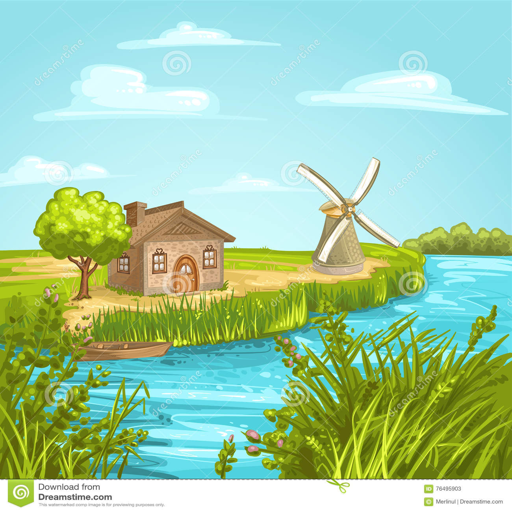

In [14]:
import requests
from io import BytesIO
from PIL import Image

url="https://thumbs.dreamstime.com/z/house-near-river-illustration-76495903.jpg"
response = requests.get(url)
init_img = Image.open(BytesIO(response.content)).convert("RGB")
init_img = init_img.resize((512, 512))
init_img

Define the prompt and run the pipeline

In [27]:
prompt="A fantasy house, trending on artstation"

Here, strength is a value between 0.0 and 1.0, that controls the amount of noise that is added to the input image. Values that approach 1.0 allow for lots of variations but will also produce images that are not semantically consistent with the input.

In [28]:
generator=torch.Generator(device=device).manual_seed(1024)
with autocast("cuda"):
  image=pipe(prompt=prompt,init_image=init_img,strength=0.75,guidance_scale=7.5,generator=generator).images[0]

  0%|          | 0/37 [00:00<?, ?it/s]

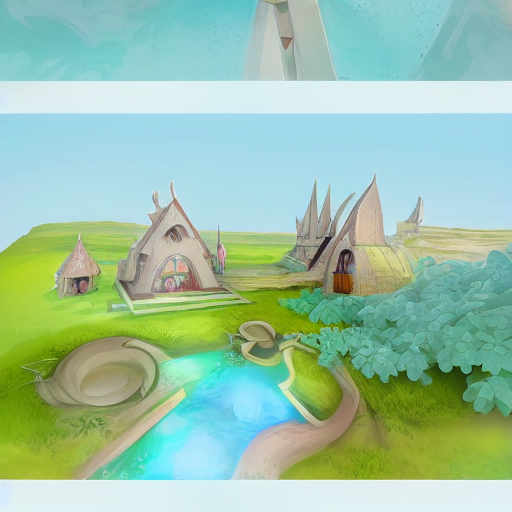

In [29]:
image

In [30]:
with autocast("cuda"):
  image=pipe(prompt=prompt,init_image=init_img,strength=0.5,guidance_scale=7.5,generator=generator).images[0]

  0%|          | 0/25 [00:00<?, ?it/s]

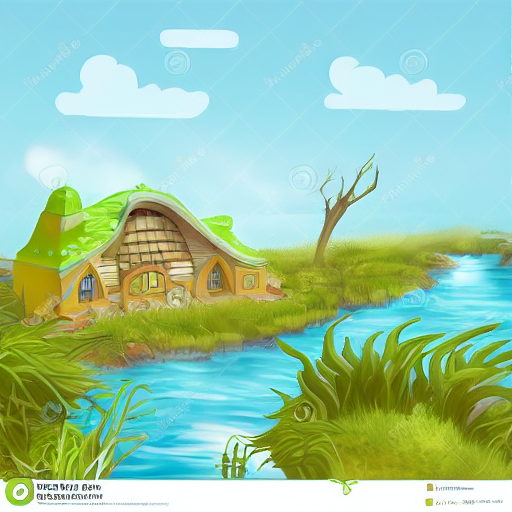

In [31]:
image

As you can see, when using a lower value for strength, the generated image is more closer to the original init_image

now using *LMSDiscreteScheduler*




In [32]:
from diffusers import LMSDiscreteScheduler


lms=LMSDiscreteScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear")
pipe.scheduler=lms

In [33]:
with autocast("cuda"):
  image=pipe(prompt=prompt,init_image=init_img,strength=0.75,guidance_scale=7.5,generator=generator).images[0]


  0%|          | 0/37 [00:00<?, ?it/s]

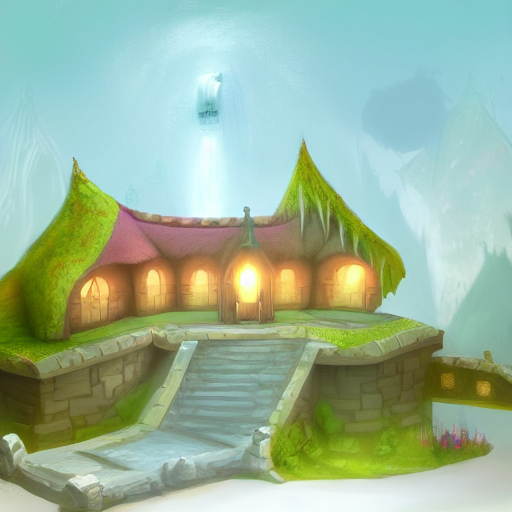

In [34]:
image